# Tarea 7

Nombre:  **Nombre Apellido Apellido** 

x/11/2020

## Repaso

Antes de empezar es necesario que repases las soluciones de **ejercicios anteriores** en los que hayas tenido dificultades y consultes al profesor cualquier duda que tengas. En la tarea de hoy debes incluir un apartado que explique estas dificultades y cómo las has resuelto.

## Ejercicios

Resuelve los siguientes ejercicios, usando únicamente los conceptos explicados en clase hasta ahora.

**1)** Añade perturbaciones aleatorias y otras modificaciones al árbol recursivo para conseguir un aspecto más natural.

**2)** Dibuja un copo de nieve de Koch.

**3)** Simula una órbita parecida a la de la luna. Sitúa la posición inicial a 384Mm y la velocidad inicial 1Km/s. El parámetro gravitacional de la Tierra es $\mu = GM =  3.986 \times 10^{14} (m^3/s^2)$. Con esos datos completará una órbita en 26 días aproximadamente; puedes aumentar ligeramente la velocidad para que el período se aproxime más a la realidad (27.3 días). También se puede deducir la velocidad y el radio de una órbita circular que tenga el período deseado, y comprobar que la trayectoria obtenida con esos valores  es la esperada.

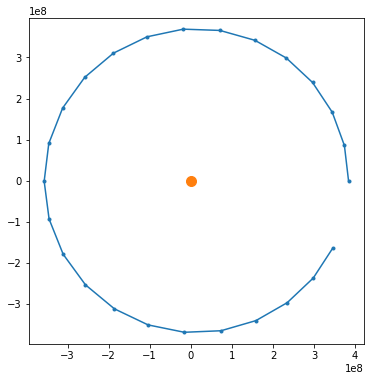

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

# SI
ua = 150e9          # m
yr = 365*24*60*60   # s
day = 24*60*60      # s

mu = 3.986E14   # GM Tierra   (m^3/s^2)

def sdot(z,t):
    x,y,vx,vy = z
    d = (x**2 + y**2)**(1/2)
    k = -mu/d**3
    ax = k*x
    ay = k*y
    return vx,vy,ax,ay

t = np.arange(0,25*day,day)

# condiciones iniciales
x0  = 384000000  # distancia tierra-luna (m)
y0  = 0
vx0 = 0
vy0 = 1000       # velocidad de la luna en su órbita (m/s)

x,y,vx,vy = odeint(sdot,[x0,y0,vx0,vy0],t).T

plt.figure(figsize=(6,6))
plt.plot(x,y,'.-');
plt.plot([0],[0],'.',markersize=20)
plt.plot(vx,vy)
plt.axis('equal');

**4)** Crea una animación [parecida a ésta](https://robot.inf.um.es/material/inforfis/graph/caja.mp4), situando una barrera dentro de una caja llena de partículas.

**5)** Escribe funciones para calcular el máximo común divisor de dos números a) por fuerza bruta, b) mediante divisiones sucesivas (iterativamente) c) mediante divisiones sucesivas (recursivamente).

In [2]:
def mcd1(a,b):
    for n in range(a,0,-1):
        if a%n == 0 and b%n == 0:
            return n

In [3]:
mcd1(75,50)

25

In [4]:
def mcd2(a,b):
    r = a%b
    while r!=0:
        a,b = b,r
        r = a%b
    return b

In [5]:
mcd2(50,75)

25

In [6]:
def mcd3(a,b):
    #print(a,b)
    if b==0:
        return a
    else:
        return mcd3(b, a%b)

In [7]:
mcd3(12,18), mcd3(80,71)

(6, 1)

**6)** Escribe una función que construya una lista con todos los divisores de un número y apóyate en ella para definir funciones que determinen a) si un número es primo b) si un número es [perfecto](https://en.wikipedia.org/wiki/Perfect_number).

In [8]:
def divis(n):
    return [k for k in range(1,n+1) if n%k==0]

In [9]:
divis(12), divis(15)

([1, 2, 3, 4, 6, 12], [1, 3, 5, 15])

In [10]:
def primo(n):
    return divis(n) == [1,n]

In [11]:
primo(14), primo(19)

(False, True)

In [12]:
def perfecto(n):
    return sum(divis(n)) == 2*n

In [13]:
perfecto(27), perfecto(28)

(False, True)

**7)** Los primeros valores de la función $n^2+n+41$ para $n=0,1,2,\ldots$ son primos: 41, 43, 47, 53,... ¿Cuál es el primer $n$ que produce un número compuesto?

In [14]:
for n in range(100):
    p = n**2+n+41
    if not primo(p):
        print(f'Falla con n={n}, {p} es compuesto')
        break
    else:
        print(n,p)

0 41
1 43
2 47
3 53
4 61
5 71
6 83
7 97
8 113
9 131
10 151
11 173
12 197
13 223
14 251
15 281
16 313
17 347
18 383
19 421
20 461
21 503
22 547
23 593
24 641
25 691
26 743
27 797
28 853
29 911
30 971
31 1033
32 1097
33 1163
34 1231
35 1301
36 1373
37 1447
38 1523
39 1601
Falla con n=40, 1681 es compuesto


**8)** Encuentra el [número perfecto](https://en.wikipedia.org/wiki/Perfect_number) más grande que puedas.

In [15]:
# por fuerza bruta... pongo un límite pequeño
# para no perder mucho tiempo.
for k in range(10000):
    if perfecto(k):
        print(k)

0
6
28
496
8128


**9)** Escribe una función para construir una lista con la secuencia [Collatz](https://en.wikipedia.org/wiki/Collatz_conjecture) que empieza en el argumento $n$. Intenta hacerlo mediante una definición recursiva. Encuentra el $n<1000$ que produce la secuencia más larga.

In [16]:
def coll(n):
    if n <= 1:
        sig = []
    elif n%2 == 0:
        sig = coll(n//2)
    else:
        sig = coll(3*n+1)
    return [n] + sig

In [17]:
coll(17)

[17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

In [18]:
max([(len(coll(k)),k) for k in range(1000)])

(179, 871)

In [19]:
coll(871)

[871,
 2614,
 1307,
 3922,
 1961,
 5884,
 2942,
 1471,
 4414,
 2207,
 6622,
 3311,
 9934,
 4967,
 14902,
 7451,
 22354,
 11177,
 33532,
 16766,
 8383,
 25150,
 12575,
 37726,
 18863,
 56590,
 28295,
 84886,
 42443,
 127330,
 63665,
 190996,
 95498,
 47749,
 143248,
 71624,
 35812,
 17906,
 8953,
 26860,
 13430,
 6715,
 20146,
 10073,
 30220,
 15110,
 7555,
 22666,
 11333,
 34000,
 17000,
 8500,
 4250,
 2125,
 6376,
 3188,
 1594,
 797,
 2392,
 1196,
 598,
 299,
 898,
 449,
 1348,
 674,
 337,
 1012,
 506,
 253,
 760,
 380,
 190,
 95,
 286,
 143,
 430,
 215,
 646,
 323,
 970,
 485,
 1456,
 728,
 364,
 182,
 91,
 274,
 137,
 412,
 206,
 103,
 310,
 155,
 466,
 233,
 700,
 350,
 175,
 526,
 263,
 790,
 395,
 1186,
 593,
 1780,
 890,
 445,
 1336,
 668,
 334,
 167,
 502,
 251,
 754,
 377,
 1132,
 566,
 283,
 850,
 425,
 1276,
 638,
 319,
 958,
 479,
 1438,
 719,
 2158,
 1079,
 3238,
 1619,
 4858,
 2429,
 7288,
 3644,
 1822,
 911,
 2734,
 1367,
 4102,
 2051,
 6154,
 3077,
 9232,
 4616,
 2308,


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

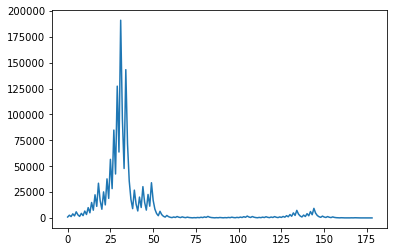

In [21]:
plt.plot(coll(871));